In [3]:
import pandas as pd
import copy
import numpy as np
from numpy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import keras as keras
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import autograd.numpy as anp
from autograd import jacobian

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
import os
os.getcwd()

'C:\\Users\\Patrice\\Documents\\Neural Network\\Distillation'

In [5]:
data = pd.read_csv("Still2.csv")
dataset = data.values
dataset

array([[125.0332489 ,  48.50588608, 173.5945892 , ..., 346.2849731 ,
          1.84048827,  84.        ],
       [134.0503845 ,  47.58906555, 173.138443  , ..., 501.0728149 ,
          1.75659263,  84.5       ],
       [129.2543335 ,  48.96544647, 173.3461304 , ..., 506.2529602 ,
          1.87202663,  84.25      ],
       ...,
       [119.2128754 ,  98.75088501, 173.1824493 , ..., 618.1845703 ,
          1.80861027,  83.46      ],
       [118.696701  ,  99.91643524, 173.3771515 , ..., 617.1276245 ,
          1.81537637,  83.44      ],
       [118.7883911 ,  99.95228577, 173.3963928 , ..., 599.4073486 ,
          1.79868844,  83.55      ]])

In [6]:
data.columns

Index(['RefluxFlow ', 'SteamControlValve', 'FeedTempintoStill', 'BottomsTemp ',
       'TopsTemp', 'RefluxTemp', 'FeedPurity', 'ReboilerPressure',
       'MainCondenserPressure ', 'TWCV ', 'CondenserPressure',
       'FeedFlowtoStill', 'Efficiency', 'Purity'],
      dtype='object')

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RefluxFlow,2610.0,125.967697,20.374146,30.964821,114.308083,124.573139,134.975803,242.570694
SteamControlValve,2610.0,57.970082,11.440985,39.952881,50.153181,54.853920,62.423813,100.000000
FeedTempintoStill,2610.0,168.486832,3.400376,137.797104,167.253418,169.258316,170.531158,175.722763
BottomsTemp,2610.0,220.545241,0.980802,211.884247,219.849579,220.477570,221.221378,223.619217
TopsTemp,2610.0,182.229494,0.973785,179.581482,181.526058,182.150177,182.860538,189.440277
RefluxTemp,2610.0,151.356486,5.962036,129.932465,147.397453,152.008919,156.330864,159.996277
FeedPurity,2610.0,56.026031,2.460993,40.910774,55.203824,56.621929,57.622443,59.967125
ReboilerPressure,2610.0,25.774587,4.053145,15.487555,22.750895,25.364768,28.819992,37.350178
MainCondenserPressure,2610.0,1.436490,0.242539,0.690137,1.261244,1.442193,1.625869,2.113526
TWCV,2610.0,49.442112,13.608000,0.000000,40.000000,53.000000,60.000000,75.000000


In [8]:
#Split the data into training, validation, and testing sets, 60/20/20
train, test = train_test_split(data, test_size=0.2, random_state=1)
#Use .25 on the training data this time so the math works out
train,val = train_test_split(train, test_size=0.25, random_state=1)
#Print the dimensions of each feature matrix (3 matrices)
print('Training feature dimensions:',train.shape)
print('Testing feature dimensions:',test.shape)
print('Validation feature dimensions:',val.shape) 


Training feature dimensions: (1566, 14)
Testing feature dimensions: (522, 14)
Validation feature dimensions: (522, 14)


In [9]:
#Remove output columns from training data
train_stats = train.describe()
train_stats.pop('Efficiency')
train_stats.pop('Purity')
train_stats = train_stats.transpose()

In [10]:
train_stats

,count,mean,std,min,25%,50%,75%,max
RefluxFlow,1566.0,126.184336,19.972723,30.964821,114.487127,124.962868,134.930340,242.570694
SteamControlValve,1566.0,57.779500,11.129633,39.952881,50.186040,54.838202,62.245588,100.000000
FeedTempintoStill,1566.0,168.502456,3.389906,137.797104,167.327911,169.295502,170.531075,174.776810
BottomsTemp,1566.0,220.533329,0.981671,211.884247,219.844795,220.486252,221.227146,223.619217
TopsTemp,1566.0,182.223596,0.973696,179.762695,181.524178,182.150177,182.859493,189.440277
RefluxTemp,1566.0,151.373872,5.964649,129.932465,147.302563,152.099426,156.266609,159.996277
FeedPurity,1566.0,56.135350,2.400012,40.910774,55.306348,56.718826,57.664707,59.967125
ReboilerPressure,1566.0,25.726607,4.041392,15.799937,22.743465,25.283723,28.766784,37.075279
MainCondenserPressure,1566.0,1.434515,0.241781,0.690137,1.260102,1.439908,1.618471,2.111622
TWCV,1566.0,49.310823,13.743887,0.000000,40.000000,53.000000,60.000000,75.000000


In [11]:
#normalization function
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

#function that removes output columns from dataset and places into two arrays, y1 and y2
def format_output(data):
    y1 = data.pop('Efficiency')
    y1 = np.array(y1)
    y2 = data.pop('Purity')
    y2 = np.array(y2)
    return y1, y2


#format training, validation, and testing sets
Y_train = format_output(train)
Y_test = format_output(test)
Y_val = format_output(val)


In [12]:
eff_std = np.std(Y_train[0])
eff_mean = np.mean(Y_train[0])
pur_std = np.std(Y_train[1])
pur_mean = np.mean(Y_train[1])
pur_std
def eff_norm(x):
    return (x - eff_mean) / eff_std
def pur_norm(x):
    return (x - pur_mean) / pur_std
def Y_norm(x):
    y1 = eff_norm(x[0])
    y2 = pur_norm(x[1])
    return y1, y2
Y_train = Y_norm(Y_train)
Y_test = Y_norm(Y_test)
Y_val = Y_norm(Y_val)

In [13]:
import copy
#normalize the data sets
#X_train = np.array(norm(train))
#X_test = np.array(norm(test))
#X_val = np.array(norm(val))

test_data = copy.deepcopy(test)

scaler = StandardScaler()
X_train = scaler.fit_transform(train)
#Apply same transformation to test data and validation data
X_test = scaler.transform(test)
X_val = scaler.transform(val)

#changes all NaN values to 0
NaNtrain = isnan(X_train)
NaNtest = isnan(X_test)
NaNval = isnan(X_val)
X_train[NaNtrain] = 0
X_test[NaNtest] = 0
X_val[NaNval] = 0



In [14]:
X_test[0]

array([-0.99693948,  1.25767295, -0.98230458,  1.45687439,  1.63213014,
        1.2392826 ,  0.70129185,  0.74143378,  2.20465761,  0.45046604,
        1.64699183,  1.70720803])

In [15]:
#funtion that defines the structure(layers) of your Neural Network
def build_model():
    # Define model layers.
    input_layer = keras.Input(shape=(len(train.columns),))
    
    dense = Dense(units='128', activation='relu')(input_layer)
    dense = Dense(units='16', activation='relu')(dense)
    # Y1 output will be fed from the dense
    y1_output = Dense(units='1', activation='linear', name='Efficiency')(dense)
    # Y2 output will be fed from the dropout
    
    dense = Dense(units='128', activation='relu')(input_layer)
    dense = Dense(units='16', activation='relu')(dense)
    y2_output = Dense(units='1',activation='linear', name='Purity')(dense)
    
    # Define the model with the input layer 
    # and a list of output layers
    model = keras.Model(inputs=input_layer,outputs=[y1_output, y2_output])
    
    # Specify the optimizer, and compile the model with loss functions for both outputs
    optimizer = tf.keras.optimizers.SGD(lr=0.001)
    model.compile(optimizer='adam',
              loss={'Efficiency': 'mean_squared_error', 'Purity': 'mean_squared_error'},
    metrics={'Efficiency':tf.keras.metrics.MeanSquaredError(),
          'Purity':tf.keras.metrics.MeanSquaredError()})
    return model

In [16]:
#Fit model with 100 epochs and batch size of 100
model = build_model()
model.fit(X_train, Y_train, epochs=200, batch_size=150, validation_data=(X_val, Y_val))

Epoch 1/200
11/11 [==============================] - 0s 21ms/step - loss: 1.8423 - Efficiency_loss: 0.9107 - Purity_loss: 0.9316 - Efficiency_mean_squared_error: 0.9107 - Purity_mean_squared_error: 0.9316 - val_loss: 1.9626 - val_Efficiency_loss: 0.7216 - val_Purity_loss: 1.2410 - val_Efficiency_mean_squared_error: 0.7216 - val_Purity_mean_squared_error: 1.2410
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2923 - Efficiency_loss: 0.5599 - Purity_loss: 0.7324 - Efficiency_mean_squared_error: 0.5599 - Purity_mean_squared_error: 0.7324 - val_loss: 1.6371 - val_Efficiency_loss: 0.5810 - val_Purity_loss: 1.0561 - val_Efficiency_mean_squared_error: 0.5810 - val_Purity_mean_squared_error: 1.0561
Epoch 3/200
11/11 [==============================] - 0s 1ms/step - loss: 1.0967 - Efficiency_loss: 0.4689 - Purity_loss: 0.6278 - Efficiency_mean_squared_error: 0.4689 - Purity_mean_squared_error: 0.6278 - val_loss: 1.4683 - val_Efficiency_loss: 0.5186 - val_Purity_loss: 0

11/11 [==============================] - 0s 2ms/step - loss: 0.6489 - Efficiency_loss: 0.2750 - Purity_loss: 0.3738 - Efficiency_mean_squared_error: 0.2750 - Purity_mean_squared_error: 0.3738 - val_loss: 1.1607 - val_Efficiency_loss: 0.4237 - val_Purity_loss: 0.7370 - val_Efficiency_mean_squared_error: 0.4237 - val_Purity_mean_squared_error: 0.7370
Epoch 24/200
11/11 [==============================] - 0s 1ms/step - loss: 0.6404 - Efficiency_loss: 0.2709 - Purity_loss: 0.3695 - Efficiency_mean_squared_error: 0.2709 - Purity_mean_squared_error: 0.3695 - val_loss: 1.1546 - val_Efficiency_loss: 0.4303 - val_Purity_loss: 0.7243 - val_Efficiency_mean_squared_error: 0.4303 - val_Purity_mean_squared_error: 0.7243
Epoch 25/200
11/11 [==============================] - 0s 1ms/step - loss: 0.6302 - Efficiency_loss: 0.2657 - Purity_loss: 0.3645 - Efficiency_mean_squared_error: 0.2657 - Purity_mean_squared_error: 0.3645 - val_loss: 1.1492 - val_Efficiency_loss: 0.4216 - val_Purity_loss: 0.7277 - val

11/11 [==============================] - 0s 1ms/step - loss: 0.4817 - Efficiency_loss: 0.1977 - Purity_loss: 0.2839 - Efficiency_mean_squared_error: 0.1977 - Purity_mean_squared_error: 0.2839 - val_loss: 1.0988 - val_Efficiency_loss: 0.4107 - val_Purity_loss: 0.6881 - val_Efficiency_mean_squared_error: 0.4107 - val_Purity_mean_squared_error: 0.6881
Epoch 46/200
11/11 [==============================] - 0s 1ms/step - loss: 0.4755 - Efficiency_loss: 0.1937 - Purity_loss: 0.2818 - Efficiency_mean_squared_error: 0.1937 - Purity_mean_squared_error: 0.2818 - val_loss: 1.1161 - val_Efficiency_loss: 0.4237 - val_Purity_loss: 0.6925 - val_Efficiency_mean_squared_error: 0.4237 - val_Purity_mean_squared_error: 0.6925
Epoch 47/200
11/11 [==============================] - 0s 1ms/step - loss: 0.4745 - Efficiency_loss: 0.1920 - Purity_loss: 0.2825 - Efficiency_mean_squared_error: 0.1920 - Purity_mean_squared_error: 0.2825 - val_loss: 1.0956 - val_Efficiency_loss: 0.4151 - val_Purity_loss: 0.6805 - val

11/11 [==============================] - 0s 1ms/step - loss: 0.3715 - Efficiency_loss: 0.1452 - Purity_loss: 0.2263 - Efficiency_mean_squared_error: 0.1452 - Purity_mean_squared_error: 0.2263 - val_loss: 1.0939 - val_Efficiency_loss: 0.4177 - val_Purity_loss: 0.6763 - val_Efficiency_mean_squared_error: 0.4177 - val_Purity_mean_squared_error: 0.6763
Epoch 68/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3767 - Efficiency_loss: 0.1432 - Purity_loss: 0.2334 - Efficiency_mean_squared_error: 0.1432 - Purity_mean_squared_error: 0.2334 - val_loss: 1.1189 - val_Efficiency_loss: 0.4188 - val_Purity_loss: 0.7001 - val_Efficiency_mean_squared_error: 0.4188 - val_Purity_mean_squared_error: 0.7001
Epoch 69/200
11/11 [==============================] - 0s 1ms/step - loss: 0.3794 - Efficiency_loss: 0.1463 - Purity_loss: 0.2331 - Efficiency_mean_squared_error: 0.1463 - Purity_mean_squared_error: 0.2331 - val_loss: 1.1038 - val_Efficiency_loss: 0.4222 - val_Purity_loss: 0.6817 - val

11/11 [==============================] - 0s 1ms/step - loss: 0.2956 - Efficiency_loss: 0.1150 - Purity_loss: 0.1806 - Efficiency_mean_squared_error: 0.1150 - Purity_mean_squared_error: 0.1806 - val_loss: 1.1035 - val_Efficiency_loss: 0.4381 - val_Purity_loss: 0.6654 - val_Efficiency_mean_squared_error: 0.4381 - val_Purity_mean_squared_error: 0.6654
Epoch 90/200
11/11 [==============================] - 0s 1ms/step - loss: 0.2961 - Efficiency_loss: 0.1162 - Purity_loss: 0.1799 - Efficiency_mean_squared_error: 0.1162 - Purity_mean_squared_error: 0.1799 - val_loss: 1.1146 - val_Efficiency_loss: 0.4299 - val_Purity_loss: 0.6847 - val_Efficiency_mean_squared_error: 0.4299 - val_Purity_mean_squared_error: 0.6847
Epoch 91/200
11/11 [==============================] - 0s 1ms/step - loss: 0.2956 - Efficiency_loss: 0.1169 - Purity_loss: 0.1787 - Efficiency_mean_squared_error: 0.1169 - Purity_mean_squared_error: 0.1787 - val_loss: 1.0968 - val_Efficiency_loss: 0.4328 - val_Purity_loss: 0.6640 - val

11/11 [==============================] - 0s 1ms/step - loss: 0.2443 - Efficiency_loss: 0.0945 - Purity_loss: 0.1498 - Efficiency_mean_squared_error: 0.0945 - Purity_mean_squared_error: 0.1498 - val_loss: 1.1072 - val_Efficiency_loss: 0.4422 - val_Purity_loss: 0.6651 - val_Efficiency_mean_squared_error: 0.4422 - val_Purity_mean_squared_error: 0.6651
Epoch 112/200
11/11 [==============================] - 0s 1ms/step - loss: 0.2449 - Efficiency_loss: 0.0946 - Purity_loss: 0.1503 - Efficiency_mean_squared_error: 0.0946 - Purity_mean_squared_error: 0.1503 - val_loss: 1.0979 - val_Efficiency_loss: 0.4387 - val_Purity_loss: 0.6592 - val_Efficiency_mean_squared_error: 0.4387 - val_Purity_mean_squared_error: 0.6592
Epoch 113/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2422 - Efficiency_loss: 0.0968 - Purity_loss: 0.1454 - Efficiency_mean_squared_error: 0.0968 - Purity_mean_squared_error: 0.1454 - val_loss: 1.1004 - val_Efficiency_loss: 0.4431 - val_Purity_loss: 0.6573 - v

11/11 [==============================] - 0s 1ms/step - loss: 0.2031 - Efficiency_loss: 0.0799 - Purity_loss: 0.1232 - Efficiency_mean_squared_error: 0.0799 - Purity_mean_squared_error: 0.1232 - val_loss: 1.1109 - val_Efficiency_loss: 0.4443 - val_Purity_loss: 0.6666 - val_Efficiency_mean_squared_error: 0.4443 - val_Purity_mean_squared_error: 0.6666
Epoch 134/200
11/11 [==============================] - 0s 1ms/step - loss: 0.2033 - Efficiency_loss: 0.0773 - Purity_loss: 0.1259 - Efficiency_mean_squared_error: 0.0773 - Purity_mean_squared_error: 0.1259 - val_loss: 1.1131 - val_Efficiency_loss: 0.4458 - val_Purity_loss: 0.6673 - val_Efficiency_mean_squared_error: 0.4458 - val_Purity_mean_squared_error: 0.6673
Epoch 135/200
11/11 [==============================] - 0s 1ms/step - loss: 0.2069 - Efficiency_loss: 0.0778 - Purity_loss: 0.1292 - Efficiency_mean_squared_error: 0.0778 - Purity_mean_squared_error: 0.1292 - val_loss: 1.1047 - val_Efficiency_loss: 0.4479 - val_Purity_loss: 0.6569 - v

11/11 [==============================] - 0s 1ms/step - loss: 0.1699 - Efficiency_loss: 0.0658 - Purity_loss: 0.1041 - Efficiency_mean_squared_error: 0.0658 - Purity_mean_squared_error: 0.1041 - val_loss: 1.1148 - val_Efficiency_loss: 0.4532 - val_Purity_loss: 0.6615 - val_Efficiency_mean_squared_error: 0.4532 - val_Purity_mean_squared_error: 0.6615
Epoch 156/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1728 - Efficiency_loss: 0.0665 - Purity_loss: 0.1063 - Efficiency_mean_squared_error: 0.0665 - Purity_mean_squared_error: 0.1063 - val_loss: 1.1284 - val_Efficiency_loss: 0.4608 - val_Purity_loss: 0.6676 - val_Efficiency_mean_squared_error: 0.4608 - val_Purity_mean_squared_error: 0.6676
Epoch 157/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1760 - Efficiency_loss: 0.0670 - Purity_loss: 0.1090 - Efficiency_mean_squared_error: 0.0670 - Purity_mean_squared_error: 0.1090 - val_loss: 1.1235 - val_Efficiency_loss: 0.4617 - val_Purity_loss: 0.6618 - v

11/11 [==============================] - 0s 1ms/step - loss: 0.1491 - Efficiency_loss: 0.0598 - Purity_loss: 0.0893 - Efficiency_mean_squared_error: 0.0598 - Purity_mean_squared_error: 0.0893 - val_loss: 1.1345 - val_Efficiency_loss: 0.4603 - val_Purity_loss: 0.6742 - val_Efficiency_mean_squared_error: 0.4603 - val_Purity_mean_squared_error: 0.6742
Epoch 178/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1516 - Efficiency_loss: 0.0597 - Purity_loss: 0.0919 - Efficiency_mean_squared_error: 0.0597 - Purity_mean_squared_error: 0.0919 - val_loss: 1.1386 - val_Efficiency_loss: 0.4650 - val_Purity_loss: 0.6736 - val_Efficiency_mean_squared_error: 0.4650 - val_Purity_mean_squared_error: 0.6736
Epoch 179/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1497 - Efficiency_loss: 0.0582 - Purity_loss: 0.0915 - Efficiency_mean_squared_error: 0.0582 - Purity_mean_squared_error: 0.0915 - val_loss: 1.1276 - val_Efficiency_loss: 0.4625 - val_Purity_loss: 0.6650 - v

11/11 [==============================] - 0s 1ms/step - loss: 0.1290 - Efficiency_loss: 0.0516 - Purity_loss: 0.0775 - Efficiency_mean_squared_error: 0.0516 - Purity_mean_squared_error: 0.0775 - val_loss: 1.1529 - val_Efficiency_loss: 0.4743 - val_Purity_loss: 0.6786 - val_Efficiency_mean_squared_error: 0.4743 - val_Purity_mean_squared_error: 0.6786
Epoch 200/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1324 - Efficiency_loss: 0.0519 - Purity_loss: 0.0805 - Efficiency_mean_squared_error: 0.0519 - Purity_mean_squared_error: 0.0805 - val_loss: 1.1530 - val_Efficiency_loss: 0.4731 - val_Purity_loss: 0.6799 - val_Efficiency_mean_squared_error: 0.4731 - val_Purity_mean_squared_error: 0.6799


In [17]:
import os.path
if os.path.isfile('distillation_model.h5') is False:
    model.save('distillation_model.h5')

In [18]:
from tensorflow.keras.models import load_model
prediction = load_model('distillation_model.h5')
prediction.optimizer

In [19]:
prediction.predict(X_test[1:2])

[array([[0.0356084]], dtype=float32), array([[1.0919118]], dtype=float32)]

In [18]:
'''import sys
import os
from statistics import mean
from PyQt5 import QtWidgets
from PyQt5.QtWidgets import QDialog, QApplication, QMainWindow, QFileDialog, QLCDNumber, QLabel, QHBoxLayout, QWidget
from PyQt5.uic import loadUi
from PyQt5.QtGui import QPixmap
from PyQt5.QtCore import *
import serial
import time, threading
import pandas as pd
import numpy as np


def eff_rev_norm(efficiency):
    return (efficiency*eff_std) + eff_mean
    
def pur_rev_norm(purity):
    return (purity*pur_std) + pur_mean


class GetData(QThread):
    dataChanged = pyqtSignal(float)
    Distance = 0.5

    def __init__(self, parent=None):
        QThread.__init__(self, parent)

        arduino_ports = 'COM9'

        if not arduino_ports:
            raise IOError("No Arduino found - is it plugged in? If so, restart computer.")
        self.Arduino = serial.Serial(arduino_ports, 9600, timeout=1)

    def __del__(self):  # part of the standard format of a QThread
        self.wait()

    def run(self):  # also a required QThread function, the working part
        self.Arduino.close()
        self.Arduino.open()

        self.Arduino.flush()
        self.Arduino.reset_input_buffer()
        start_time = time.time()
        self.file = pd.read_csv("test_csv.csv")
        inputs = []

        while True:
            try:
                data = self.Arduino.readline()
                if data:
                    string = data.decode()
                    num = int(string)
                    inputs.append(num)
                for i in range(len(inputs)):
                    self.file.loc[i, 'potentiometer'] = inputs[i]
                self.Arduino.reset_input_buffer()
                #light = inputs[-2:]
                scaler = StandardScaler()
                dataset = scaler.fit_transform(self.file)
                intensity = np.nanmean(prediction.predict(dataset))
                self.dataChanged.emit(intensity)
            except (KeyboardInterrupt, SystemExit, IndexError, ValueError):
                pass





class start(QDialog):
    def __init__(self):
        super(start,self).__init__()
        loadUi("NNstart.ui", self)
        self.startButton.clicked.connect(self.startFunction)
        self.homeButton.clicked.connect(self.homeFunction)
        self.startButton.clicked.connect(self.eff)
        #self.startButton.clicked.connect(self.readData)
        self.browse.clicked.connect(self.browsefiles)
        self.warningButton.hide()
        self.efficiency.hide()
        self.purity.hide()
        self.graphWidget.hide()
        self.eff_label.hide()
        self.pur_label.hide()
        self.homeButton.hide()
        
        self.cur_data = None
        self.has_new_data = False
        
        self.thread = GetData(self)
        self.thread.dataChanged.connect(self.eff)
        self.thread.dataChanged.connect(self.update)
        self.thread.start()
        
        self.windowWidth = 451                       # width of the window displaying the curve
        self.Xm = np.linspace(0,0,self.windowWidth)          # create array that will contain the relevant time series     
        self.ptr = 0                                  #set first x position
        self.curve = self.graphWidget.plot()
        
        self.pixmap = QPixmap("kinergeticslogo.png")                                                                                                        
        self.label = QLabel(self)                                                                                                                 
        self.label.setPixmap(self.pixmap)     
        self.resize(self.pixmap.width(),self.pixmap.height())
        self.show()
    
    def onDataChanged(self, intensity):
        self.lcdNumber_4.display(intensity)
        
    def update(self, intensity):    
        self.Xm[:-1] = self.Xm[1:]                 # shift data in the temporal mean 1 sample left
        value = intensity                              # read line (single value) from the serial port
        self.Xm[-1] = float(value)                 # vector containing the instantaneous values      
        self.ptr += 1                              # update x position for displaying the curve
        self.curve.setData(self.Xm)                     # set the curve with this data
        self.curve.setPos(self.ptr,0)                   # set x position in the graph to 0
        
    
    def gotorun(self):
        simulation = sim()
        widget.addWidget(simulation)
        widget.setCurrentIndex(widget.currentIndex() +1)
        
    def eff(self,light):
        self.efficiency.display(float(light))
        
    def browsefiles(self):
        global fname
        fname = QFileDialog.getOpenFileName(self,'Open file', 'C:\\Users\Colton\Documents', 'CSV files (*.csv)')
        self.filename.setText(fname[0])
        
    #def readData(self):
        #dataset = self.file.values[:,0]
        #scaler = StandardScaler()
        #inputs = scaler.fit_transform(dataset)
        #return dataset
    
    #def update_csv(self):
        #self.file = pd.read_csv("test_csv.csv")
        #ser = serial.Serial('COM9', 9600, timeout=1)
        #time.sleep(2)
        #inputs = []
        #for i in range(10):
            #line = ser.readline()
            #if line:
                #string = line.decode()
                #num = int(string)
                #inputs.append(num)
        #for i in range(len(inputs)):
            #self.file.loc[i, 'potentiometer'] = inputs[i]
        #ser.close()
        #threading.Timer(60, update_csv).start() 
                    
    def startFunction(self):
        #avg_efficiency = np.mean(self.readData())
        self.startButton.hide()
        self.browse.hide()
        self.graphWidget.show()
        self.filename.hide()
        self.homeButton.show()
        self.efficiency.show()
        self.eff_label.show()
        #threading.Timer(60, self.startFunction).start()
        #return avg_efficiency
         
    
    def homeFunction(self):
        self.startButton.show()
        self.browse.show()
        self.graphWidget.hide()
        self.filename.show()
        self.homeButton.hide()
        self.efficiency.hide()
        self.eff_label.hide()
        
        
app = QApplication(sys.argv)
mainwindow = start()
widget = QtWidgets.QStackedWidget()
widget.addWidget(mainwindow)
widget.setFixedWidth(480)
widget.setFixedHeight(880)
widget.show()
app.exec_()'''

'import sys\nimport os\nfrom statistics import mean\nfrom PyQt5 import QtWidgets\nfrom PyQt5.QtWidgets import QDialog, QApplication, QMainWindow, QFileDialog, QLCDNumber, QLabel, QHBoxLayout, QWidget\nfrom PyQt5.uic import loadUi\nfrom PyQt5.QtGui import QPixmap\nfrom PyQt5.QtCore import *\nimport serial\nimport time, threading\nimport pandas as pd\nimport numpy as np\n\n\ndef eff_rev_norm(efficiency):\n    return (efficiency*eff_std) + eff_mean\n    \ndef pur_rev_norm(purity):\n    return (purity*pur_std) + pur_mean\n\n\nclass GetData(QThread):\n    dataChanged = pyqtSignal(float)\n    Distance = 0.5\n\n    def __init__(self, parent=None):\n        QThread.__init__(self, parent)\n\n        arduino_ports = \'COM9\'\n\n        if not arduino_ports:\n            raise IOError("No Arduino found - is it plugged in? If so, restart computer.")\n        self.Arduino = serial.Serial(arduino_ports, 9600, timeout=1)\n\n    def __del__(self):  # part of the standard format of a QThread\n        s

In [19]:
My_TFlite_Model = tf.keras.models.load_model('distillation_model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(My_TFlite_Model)
tflite_model = converter.convert()

open('My_TFlite_Model.tflite', 'wb').write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Patrice\AppData\Local\Temp\tmp37saww_x\assets


32444

In [20]:
# Test the model and print loss and rmse for both outputs
loss,Y1_loss,Y2_loss,Y1_mse,Y2_mse=model.evaluate(x=X_val, y=Y_val)
print()
print(f'loss: {loss}')
print(f'efficiency_loss: {Y1_loss}')
print(f'purity_loss: {Y2_loss}')
print(f'efficiency_rmse: {Y1_mse}')
print(f'purity_rmse: {Y2_mse}')

17/17 [==============================] - 0s 426us/step - loss: 1.1530 - Efficiency_loss: 0.4731 - Purity_loss: 0.6799 - Efficiency_mean_squared_error: 0.4731 - Purity_mean_squared_error: 0.6799

loss: 1.1529985666275024
efficiency_loss: 0.473063588142395
purity_loss: 0.6799349784851074
efficiency_rmse: 0.473063588142395
purity_rmse: 0.6799349784851074


In [21]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    
    plt.plot([-100, 100], [-100, 100])
    plt.show()

Efficiency MSE for Testing data is 0.4890848548653775
Purity MSE for Testing data is 0.5435345436561135


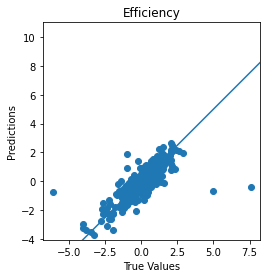

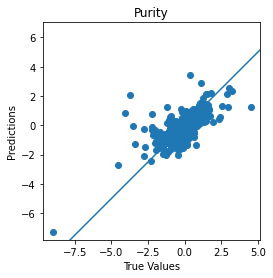

In [22]:
# Run predict
pred_test = model.predict(X_test)

flow_pred = pred_test[0]
purity_pred = pred_test[1]
#Calculate MSE
print('Efficiency MSE for Testing data is', mean_squared_error(Y_test[0], flow_pred))
print('Purity MSE for Testing data is', mean_squared_error(Y_test[1], purity_pred))


plot_diff(Y_test[0], flow_pred, title='Efficiency')
plot_diff(Y_test[1], purity_pred, title='Purity')

In [23]:
def plot_metrics(metric_name, title, ylim):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(model.history.history[metric_name], color='blue', label='Training RMSE')
    plt.plot(model.history.history['val_' + metric_name], color='orange', label='Validation RMSE')
    plt.legend()

In [24]:
#Plot Flow RMSE 
#plot_metrics(metric_name='Efficiency_mean_squared_error', title='Efficiency RMSE', ylim=3)

In [25]:
#Plot Purity RMSE
#plot_metrics(metric_name='Purity_mean_squared_error', title='Purity RMSE', ylim=5)

In [26]:
weights = [layer.get_weights()[0] for layer in model.layers[1:]]
biases = [layer.get_weights()[1] for layer in model.layers[1:]]

In [27]:
w1 = np.array([(w) for z, (w,b) in enumerate(zip(weights,biases)) if z%2==0])
b1 = np.array([(b) for z, (w,b) in enumerate(zip(weights,biases)) if z%2==0])
w2 = np.array([(w) for z, (w,b) in enumerate(zip(weights,biases)) if z%2==1])
b2 = np.array([(b) for z, (w,b) in enumerate(zip(weights,biases)) if z%2==1])

C:\Users\Patrice\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
C:\Users\Patrice\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
C:\Users\Patrice\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths o

In [28]:
def relu(node):
    return max(0, node)
    
def eff_rev_norm(efficiency):
    return (efficiency*eff_std) + eff_mean
    
def pur_rev_norm(purity):
    return (purity*pur_std) + pur_mean

In [29]:
def singleEffOutput(a,weights,biases):
    singleInputarray = copy.deepcopy(X_test)
    singleInputarray[:] = 0
    singleInputarray[0] = a[0]
    for w, b in zip(weights[:-1],biases[:-1]):
        singleInputarray = (np.dot(singleInputarray,w) + b)
        for i in range(len(singleInputarray)):
            for j in range(len(b)):
                singleInputarray[i][j] = relu(singleInputarray[i][j])
    singleInputarray = (np.dot(singleInputarray,weights[-1]) + biases[-1])

    return eff_rev_norm(singleInputarray[0])

def singlePurOutput(a, weights, biases):
    singleInputarray = copy.deepcopy(X_test)
    singleInputarray[:] = 0
    singleInputarray[0] = a[0]
    for w, b in zip(weights[:-1],biases[:-1]):
        singleInputarray = (np.dot(singleInputarray,w) + b)
        for i in range(len(singleInputarray)):
            for j in range(len(b)):
                singleInputarray[i][j] = relu(singleInputarray[i][j])
    singleInputarray = (np.dot(singleInputarray,weights[-1]) + biases[-1])

    return pur_rev_norm(singleInputarray[0])

def effOutput(a,weights,biases):
    for w, b in zip(weights[:-1],biases[:-1]):
        a = (np.dot(a,w) + b)
        for i in range(len(a)):
            for j in range(len(b)):
                a[i][j] = relu(a[i][j])
    a = (np.dot(a,weights[-1]) + biases[-1])
    return eff_rev_norm(a)

def purOutput(a,weights,biases):
    for w, b in zip(weights[:-1],biases[:-1]):
        a = (np.dot(a,w) + b)
        for i in range(len(a)):
            for j in range(len(b)):
                a[i][j] = relu(a[i][j])
    a = (np.dot(a,weights[-1]) + biases[-1])
    return pur_rev_norm(a)
        

In [30]:
#singleEffOutput(X_test,w1,b1)

In [31]:
np.mean(purOutput(X_test, w2, b2))

83.42519900553357

In [32]:
def ANNoutput(a,weight,bias):
    if len(a) == len(X_test[0]):
        singleInputarray = copy.deepcopy(X_test)
        singleInputarray[:] = 0
        singleInputarray[0] = a
        for w, b in zip(weight[:-1],bias[:-1]):
            singleInputarray = (np.dot(singleInputarray,w) + b)
            for i in range(len(singleInputarray)):
                for j in range(len(b)):
                    singleInputarray[i][j] = relu(singleInputarray[i][j])
        singleInputarray = (np.dot(singleInputarray,weight[-1]) + bias[-1])

        return singleInputarray[0]
    else:
        for w, b in zip(weight[:-1],bias[:-1]):
            a = (np.dot(a,w) + b)
            for i in range(len(a)):
                for j in range(len(b)):
                    a[i][j] = relu(a[i][j])
        a = (np.dot(a,weight[-1]) + bias[-1])
        wb = [weights,biases]
        if bias[0][0] == wb[1][0][0]:
            return eff_rev_norm(a)
        else:
            return pur_rev_norm(a)

In [33]:
def efficiency_sensitivity(data, max_percent, increment):
    import copy
    data0 = copy.deepcopy(data)
    sens = {
                'RefluxFlow': [],  
                'SteamControlValve':[], 'FeedTempintoStill':[], 'BottomsTemp':[],
                'TopsTemp':[], 'RefluxTemp':[], 'FeedPurity':[], 'ReboilerPressure':[],
                'MainCondenserPressure':[], 'TWCV':[], 'CondenserPressure':[],
                'FeedFlow':[]
    }

    for idx in sens:
        i = -(max_percent/100)
        for t in range(len(data)):
            while i <= max_percent/100:
                data_run = copy.deepcopy(data0)
                data_run[t][list(sens.keys()).index(idx)] +=  i*data_run[t][list(sens.keys()).index(idx)]
                sens[idx].append(effOutput(data_run, w1, b1)[0])
                i += increment/100

    variables = list(sens.keys())

    base = effOutput(data_run, w1, b1)[0]

    values = []
    lows = []
    for idx in sens:
        values.append(max(sens[idx]))
        lows.append(base - values[list(sens.keys()).index(idx)]/2)


    ###############################################################################
    # The actual drawing part

    # The y position for each variable
    ys = range(len(values))[::-1]  # top to bottom

    # Plot the bars, one by one
    for y, low, value in zip(ys, lows, values):
        # The width of the 'low' and 'high' pieces
        low_width = base - low
        high_width = low + value - base

        # Each bar is a "broken" horizontal bar chart
        plt.broken_barh(
            [(low, low_width), (base, high_width)],
            (y-0.4 , .9),
            facecolors=['blue', 'red'],  # Try different colors if you like
            edgecolors=['black', 'black'],
            linewidth=1,
        )

        # Display the value as text. It should be positioned in the center of
        # the 'high' bar, except if there isn't any room there, then it should be
        # next to bar instead.
        x = base + high_width / 2
        if x <= base + .5:
            x = base + high_width + .5
        plt.text(x, y, str(value), va='center', ha='center')

    # Draw a vertical line down the middle
    plt.axvline(base, color='black')

    # Position the x-axis on the top, hide all the other spines (=axis lines)
    axes = plt.gca()
    tl = plt.gca().get_yticklabels()# (gca = get current axes)
    maxsize = max([t.get_window_extent().width for t in tl])
    axes.spines['left'].set_visible(True)
    axes.spines['right'].set_visible(True)
    axes.spines['bottom'].set_visible(True)
    axes.xaxis.set_ticks_position('top')

    # Make the y-axis display the variables
    plt.yticks(ys, variables)

    # Set the portion of the x- and y-axes to show
    plt.xlim(base - 1.5, base + 1.5)
    plt.ylim(-1, len(variables))

    return pd.DataFrame.from_dict(sens)

#efficiency_sensitivity(X_test, 100, 20)

In [34]:
def purity_sensitivity(data, max_percent, increment):
        import copy
        data0 = copy.deepcopy(data)
        sens = {
                    'RefluxFlow': [],  
                    'SteamControlValve':[], 'FeedTempintoStill':[], 'BottomsTemp':[],
                    'TopsTemp':[], 'RefluxTemp':[], 'FeedPurity':[], 'ReboilerPressure':[],
                    'MainCondenserPressure':[], 'TWCV':[], 'CondenserPressure':[],
                    'FeedFlow':[]
        }

        for idx in sens:
            i = -(max_percent/100)
            for t in range(len(data)):
                while i <= max_percent/100:
                    data_run = copy.deepcopy(data0)
                    data_run[t][list(sens.keys()).index(idx)] +=  i*data_run[t][list(sens.keys()).index(idx)]
                    sens[idx].append(purOutput(data_run, w2, b2)[0])
                    i += increment/100

        variables = list(sens.keys())

        base = purOutput(data_run, w2, b2)[0]
        values = []
        lows = []
        for idx in sens:
            values.append(max(sens[idx]))
            lows.append(base - values[list(sens.keys()).index(idx)]/2)


        ###############################################################################
        # The actual drawing part

        # The y position for each variable
        ys = range(len(values))[::-1]  # top to bottom


        # Plot the bars, one by one
        for y, low, value in zip(ys, lows, values):
            # The width of the 'low' and 'high' pieces
            low_width = base - low
            high_width = low + value - base

            # Each bar is a "broken" horizontal bar chart
            plt.broken_barh(
                [(low, low_width), (base, high_width)],
                (y-0.4 , .9),
                facecolors=['blue', 'red'],  # Try different colors if you like
                edgecolors=['black', 'black'],
                linewidth=1,
            )

            # Display the value as text. It should be positioned in the center of
            # the 'high' bar, except if there isn't any room there, then it should be
            # next to bar instead.
            x = base + high_width / 2
            if x <= base + .5:
                x = base + high_width + .5
            plt.text(x, y, str(value), va='center', ha='center')

        # Draw a vertical line down the middle
        plt.axvline(base, color='black')

        # Position the x-axis on the top, hide all the other spines (=axis lines)
        axes = plt.gca()
        tl = plt.gca().get_yticklabels()# (gca = get current axes)
        #maxsize = max([t.get_window_extent().width for t in tl])
        axes.spines['left'].set_visible(True)
        axes.spines['right'].set_visible(True)
        axes.spines['bottom'].set_visible(True)
        axes.xaxis.set_ticks_position('top')

        # Make the y-axis display the variables
        plt.yticks(ys, variables)

        # Set the portion of the x- and y-axes to show
        plt.xlim(base - 50, base + 50)
        plt.ylim(-1, len(variables))

        return pd.DataFrame.from_dict(sens)
#purity_sensitivity(X_test, 100, 20)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


,RefluxFlow,SteamControlValve,FeedTempintoStill,BottomsTemp,TopsTemp,RefluxTemp,FeedPurity,ReboilerPressure,MainCondenserPressure,TWCV,CondenserPressure,FeedFlow
0,[1.7890016072200057],[1.9710324729328221],[1.851728540104148],[1.827482154682124],[1.8424614733685591],[1.8551686958384577],[1.8249831637197698],[1.8384874277678607],[1.744607805062362],[1.864545158170775],[1.8822329221759262],[1.8112529657565568]
1,[1.8017232362620605],[1.942854968643235],[1.8552198586627917],[1.8264559624901155],[1.8376458794188635],[1.8517735452318345],[1.8298852853228853],[1.8398587238904853],[1.7609198943717346],[1.854521371044997],[1.8927560429100603],[1.811115505097788]
2,[1.8139330894081735],[1.9145210696955652],[1.8546292609791954],[1.8340267823813243],[1.8376634786913328],[1.8492078560005625],[1.8330374223450947],[1.840598263888493],[1.7843779659771084],[1.8497958329294832],[1.8933541725090033],[1.8151576547088843]
3,[1.8235881628186013],[1.8854822524745947],[1.8507163425591353],[1.8417132438677115],[1.8405766082491968],[1.8461622148531331],[1.8360674369211187],[1.8407683887410369],[1.8004849114870374],[1.8472444413448021],[1.878167044763021],[1.824298412878987]
4,[1.8326846973788462],[1.8602719264859755],[1.844140568844897],[1.8446347707044926],[1.8412604218577615],[1.8441229259642613],[1.839097451497143],[1.8413097477802207],[1.8202411580675344],[1.8446930497601213],[1.8548071415415375],[1.8331982224960803]
5,[1.8421416581754402],[1.8421416581754402],[1.8421416581754402],[1.8421416581754402],[1.8421416581754402],[1.8421416581754402],[1.8421416581754402],[1.8421416581754402],[1.8421416581754402],[1.8421416581754402],[1.8421416581754402],[1.8421416581754402]
6,[1.8502802858030758],[1.8272794904873784],[1.8397291968761582],[1.8399141279825784],[1.843268607917316],[1.840428276601891],[1.84483288005132],[1.8428085959073846],[1.8655218454785067],[1.8383968465364675],[1.8292342234326553],[1.8504721672472981]
7,[1.8593103124937946],[1.8118369251094069],[1.8341367992637927],[1.8375640126162913],[1.840623382107993],[1.8392253987550058],[1.8475241019272],[1.8437392141415803],[1.887118159976004],[1.8345918019432585],[1.8202361418570625],[1.858802676319156]
8,[1.8775412843699635],[1.7969517076757242],[1.828871756482403],[1.8371165727833811],[1.8368532440552625],[1.8401412252048266],[1.8503215183494548],[1.8448406697886501],[1.9029010847052241],[1.831168349142503],[1.813054804999604],[1.867133185391014]
9,[1.8964063670453883],[1.7896661646649188],[1.8235115776327055],[1.8435573842785673],[1.8334853774719448],[1.841914796383194],[1.8532160305849024],[1.8459172887334467],[1.9225675374368854],[1.8277988295983438],[1.8088538636282945],[1.8753522553266044]


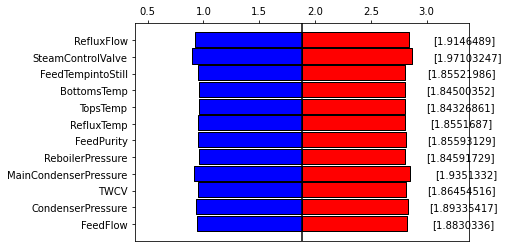

In [35]:
efficiency_sensitivity(X_test, 100, 20)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


,RefluxFlow,SteamControlValve,FeedTempintoStill,BottomsTemp,TopsTemp,RefluxTemp,FeedPurity,ReboilerPressure,MainCondenserPressure,TWCV,CondenserPressure,FeedFlow
0,[83.21947761536123],[82.8359004269712],[82.75011738986466],[82.77229489778505],[83.27784088880588],[82.74003127433508],[82.81742176865639],[82.31806042313548],[82.8875509708046],[82.66566680077935],[82.74673441740659],[81.95831214365738]
1,[83.0865630322052],[82.82020117153523],[82.73001441391673],[82.65952681166716],[83.13257992503817],[82.79373161038669],[82.78363071474708],[82.42347804536668],[82.84227655039842],[82.65906027457851],[82.66738142538793],[82.04252006252231]
2,[82.97606180982336],[82.77776737054732],[82.70463953871432],[82.59643564152326],[83.0184249380531],[82.85995318221411],[82.75089122907043],[82.50091466324555],[82.76912753332246],[82.65234385417115],[82.59246961276162],[82.16848349057192]
3,[82.86007971208858],[82.7272886987274],[82.68005495582622],[82.5851462521425],[83.01888549318802],[82.81435811478731],[82.71190372960835],[82.55472369026911],[82.67300857636997],[82.64484454981215],[82.54358255373579],[82.27805273227253]
4,[82.74127744841091],[82.6690770307549],[82.65513163190901],[82.58417748347435],[82.86418845702539],[82.71650367296209],[82.65676570200284],[82.60112888395909],[82.61877752197105],[82.63685710420488],[82.60090409685223],[82.4316868585427]
5,[82.62476384594054],[82.62476384594054],[82.62476384594054],[82.62476384594054],[82.62476384594054],[82.62476384594054],[82.62476384594054],[82.62476384594054],[82.62476384594054],[82.62476384594054],[82.62476384594054],[82.62476384594054]
6,[82.53298639577444],[82.6017211789387],[82.61480894584007],[82.74626675736174],[82.48206252018731],[82.57321105966057],[82.58731065867788],[82.65588559494775],[82.60071098842691],[82.6197547354176],[82.67548272456521],[82.8576036308493]
7,[82.39335505732629],[82.5676352705804],[82.6271079877546],[82.85389449567],[82.21050055008854],[82.55432539816736],[82.54989082198993],[82.67861264390777],[82.6152877328565],[82.61074466976828],[82.72234614672544],[83.04277896409847]
8,[82.29466337803288],[82.53819194364516],[82.6257849677642],[82.93184043278106],[81.93426373917255],[82.58901323921906],[82.51042020029466],[82.71257481430747],[82.64042663544501],[82.59247251824306],[82.8412479775072],[83.12273304790952]
9,[82.25151329329779],[82.52483132893366],[82.56829099154932],[82.95448622951176],[81.66694108820766],[82.62371729970752],[82.46954942324706],[82.732426616478],[82.74610189614053],[82.5770718956622],[82.9653997154962],[83.21362666679599]


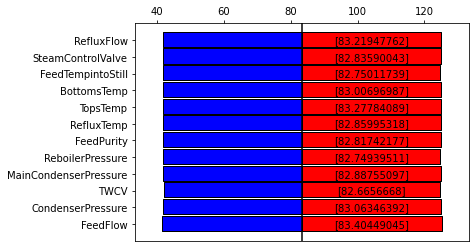

In [36]:
purity_sensitivity(X_test, 100, 20)

In [37]:
import copy
td = copy.deepcopy(test_data)
td = np.array(td)
RefluxFlow_quan = []
SteamControlValve_quan = []
FeedTempintoStill_quan = []
BottomsTemp_quan = []
TopsTemp_quan = []
RefluxTemp_quan = []
FeedPurity_quan = []
ReboilerPressure_quan = []
MainCondenserPressure_quan = []
TWCV_quan = []
CondenserPressure_quan = []
Feedflow_quan = []


for time in range(len(td)):
    RefluxFlow_quan.append(td[time][0]) 
    SteamControlValve_quan.append(td[time][1]) 
    FeedTempintoStill_quan.append(td[time][2]) 
    BottomsTemp_quan.append(td[time][3]) 
    TopsTemp_quan.append(td[time][4]) 
    RefluxTemp_quan.append(td[time][5]) 
    FeedPurity_quan.append(td[time][6])
    ReboilerPressure_quan.append(td[time][7])
    MainCondenserPressure_quan.append(td[time][8]) 
    TWCV_quan.append(td[time][9]) 
    CondenserPressure_quan.append(td[time][10]) 
    Feedflow_quan.append(td[time][11]) 

reflux = []
scv = []
for time in range(len(td)):
    td[time][0] += np.std(RefluxFlow_quan)*0.7
    td[time][1] -= np.std(SteamControlValve_quan)*0.7
    #td[time][2] -= np.std(FeedTempintoStill_quan)*0.7
    #td[time][3] += np.std(BottomsTemp_quan)*0.7
    #td[time][4] -= np.std(TopsTemp_quan)*0.7
    td[time][5] -= np.std(RefluxTemp_quan)*0.7
    #td[time][6] += np.std(FeedPurity_quan)*0.7
    #td[time][7] -= np.std(ReboilerPressure_quan)*0.7
    td[time][8] += np.std(MainCondenserPressure_quan)*0.7
    #td[time][9] += np.std(TWCV_quan)*0.7
    #td[time][10] -= np.std(CondenserPressure_quan)*0.7
    td[time][11] += np.std(Feedflow_quan)*0.7
    reflux.append(td[time][0])
    scv.append(td[time][11])
print(np.mean(reflux))
print(np.mean(scv))
test_inputs = scaler.transform(td)

139.17925755820877
568.1157744601117


C:\Users\Patrice\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [38]:
eff_increased_inputs = ANNoutput(test_inputs, w1, b1)
new_avg_eff = np.mean(eff_increased_inputs)
pur_increased_inputs = ANNoutput(test_inputs, w2, b2)
new_avg_pur = np.mean(pur_increased_inputs)

In [39]:
eff_diff = new_avg_eff-np.mean(effOutput(X_test, w1,b1))
pur_diff = new_avg_pur-np.mean(purOutput(X_test,w2,b2))
changes = {'Change in Efficiency': eff_diff,'Change in Purity': pur_diff}
changes

{'Change in Efficiency': 0.020691533488231606,
 'Change in Purity': 1.0158555169549857}

In [40]:
new_avg_eff

1.7915290861130324

In [41]:
np.mean(effOutput(X_test, w1,b1))

1.7708375526248008

In [42]:
new_steam_flow = (413.94/new_avg_eff)*6.65*60
avg_flow = 95311
avg_purity = 83.45

{'Average Steam Flow(LB/HR)':avg_flow,
 'Average Purity(%)': avg_purity,
 'New Steam Flow(LB/HR)': new_steam_flow,
 'New Purity(%)': new_avg_pur,
 'Steam Flow Difference(LB/HR)':new_steam_flow - avg_flow,
 'Purity Difference(%)': new_avg_pur - avg_purity}

{'Average Steam Flow(LB/HR)': 95311,
 'Average Purity(%)': 83.45,
 'New Steam Flow(LB/HR)': 92190.55458281266,
 'New Purity(%)': 84.44105452248856,
 'Steam Flow Difference(LB/HR)': -3120.4454171873367,
 'Purity Difference(%)': 0.9910545224885539}

In [ ]:
# 1. Import `QApplication` and all the required widgets
import sys
import os
from statistics import mean
from PyQt5 import QtWidgets
from PyQt5.QtWidgets import QDialog, QApplication, QMainWindow, QFileDialog, QLCDNumber, QLabel, QHBoxLayout, QWidget
from PyQt5.uic import loadUi
from PyQt5.QtGui import QPixmap

def eff_rev_norm(efficiency):
    return (efficiency*eff_std) + eff_mean
    
def pur_rev_norm(purity):
    return (purity*pur_std) + pur_mean

class start(QDialog):
    def __init__(self):
        super(start,self).__init__()
        loadUi("NNstart.ui", self)
        self.startButton.clicked.connect(self.startFunction)
        self.homeButton.clicked.connect(self.homeFunction)
        self.startButton.clicked.connect(self.eff)
        self.startButton.clicked.connect(self.pur)
        self.startButton.clicked.connect(self.readcsv)
        #self.warningButton.clicked.connect(self.nextPage)
        self.browse.clicked.connect(self.browsefiles)
        self.warningButton.hide()
        self.efficiency.hide()
        self.eff_label.hide()
        self.purity.hide()
        self.pur_label.hide()
        self.refluxTemp.hide()
        self.refluxTemp_label.hide()
        self.reboilerPressure.hide()
        self.reboilerPressure_label.hide()
        self.mainCondPress.hide()
        self.mainCondPress_label.hide()
        self.refluxRatio.hide()
        self.refluxRatio_label.hide()
        self.homeButton.hide()
        
        self.cur_data = None
        self.has_new_data = False
        
        self.pixmap = QPixmap("kinergeticslogo.png")                                                                                                        
        self.label = QLabel(self)                                                                                                                 
        self.label.setPixmap(self.pixmap)     
        self.resize(self.pixmap.width(),self.pixmap.height())
        self.show()
        
        
    def startFunction(self):
        avg_efficiency = np.nanmean(eff_rev_norm(prediction.predict(self.readcsv())[0]))
        avg_purity = np.nanmean(pur_rev_norm(prediction.predict(self.readcsv())[1]))
        self.startButton.hide()
        self.browse.hide()
        self.filename.hide()
        self.homeButton.show()
        self.efficiency.show()
        self.eff_label.show()
        self.purity.show()
        self.pur_label.show()
        self.refluxTemp.show()
        self.refluxTemp_label.show()
        self.reboilerPressure.show()
        self.reboilerPressure_label.show()
        self.mainCondPress.show()
        self.mainCondPress_label.show()
        self.refluxRatio.show()
        self.refluxRatio_label.show()
        return [avg_efficiency, avg_purity]

                                                                                                                   
     
    def gotorun(self):
        simulation = sim()
        widget.addWidget(simulation)
        widget.setCurrentIndex(widget.currentIndex() +1)
        
    def eff(self):
        self.efficiency.display(float(self.startFunction()[0]))
        if float(self.startFunction()[0]) < 1.82:
            self.efficiency.setStyleSheet("""QLCDNumber 
                                                   { background-color: red; 
                                                   }""")
            
    
    def pur(self):
        self.purity.display(float(self.startFunction()[1]))
        if float(self.startFunction()[1]) < 80:
            self.purity.setStyleSheet("""QLCDNumber 
                                                   { background-color: red; 
                                                   }""")
            self.warningButton.show()
        
    def browsefiles(self):
        global fname
        fname = QFileDialog.getOpenFileName(self,'Open file', 'C:\\Users\Colton\Documents', 'CSV files (*.csv)')
        self.filename.setText(fname[0])
        
    def readcsv(self):
        cleanData = pd.read_csv(fname[0])
        dataset = cleanData.values[:,1:13]
        scaler = StandardScaler()
        inputs = scaler.fit_transform(dataset)
        return inputs
        
    
    
    def homeFunction(self):
        self.startButton.show()
        self.browse.show()
        self.filename.show()
        self.homeButton.hide()
        self.efficiency.hide()
        self.eff_label.hide()
        self.purity.hide()
        self.pur_label.hide()
        
app = QApplication(sys.argv)
mainwindow = start()
widget = QtWidgets.QStackedWidget()
widget.addWidget(mainwindow)
widget.setFixedWidth(470)
widget.setFixedHeight(708)
widget.show()
app.exec_()

AttributeError: 'start' object has no attribute 'ui'

In [44]:
pur = ANNoutput(X_test, w1, b1)
eff = ANNoutput(X_test, w2, b2)

print(jacobian(pur))

<function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x000001CFD5DACEE8>


In [45]:
#data.pop('Efficiency Difference')